In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [83]:
import warnings
warnings.filterwarnings('ignore')

## Data understanding and exploration

In [84]:
car_Price = pd.read_csv('CarPrice_Assignment.csv')

In [85]:
car_Price

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [86]:
car_Price.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [87]:
car_Price.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [88]:
car_Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [89]:
car_Price.shape

(205, 26)

In [90]:
car_Price.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [91]:
car_Price.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [92]:
CompanyName = car_Price['CarName'].apply(lambda x : x.split(' ')[0])
car_Price.insert(3,"CompanyName",CompanyName)
car_Price.drop(['CarName'],axis=1,inplace=True)
car_Price.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [93]:
car_Price.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [94]:
car_Price.CompanyName = car_Price.CompanyName.str.lower()

def replace_name(a,b):
    car_Price.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')
replace_name('Nissan','nissan')

In [95]:
car_Price['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [96]:
car_Price.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [97]:
car_Price['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [98]:
car_Price['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [99]:
car_Price['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [100]:
car_Price['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [101]:
car_Price['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [102]:
car_Price['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [103]:
car_Price['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [104]:
car_Price['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

## Checking correlation with Y-variable

In [105]:
car_Price.corr()['price'].sort_values(ascending=False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

<AxesSubplot:>

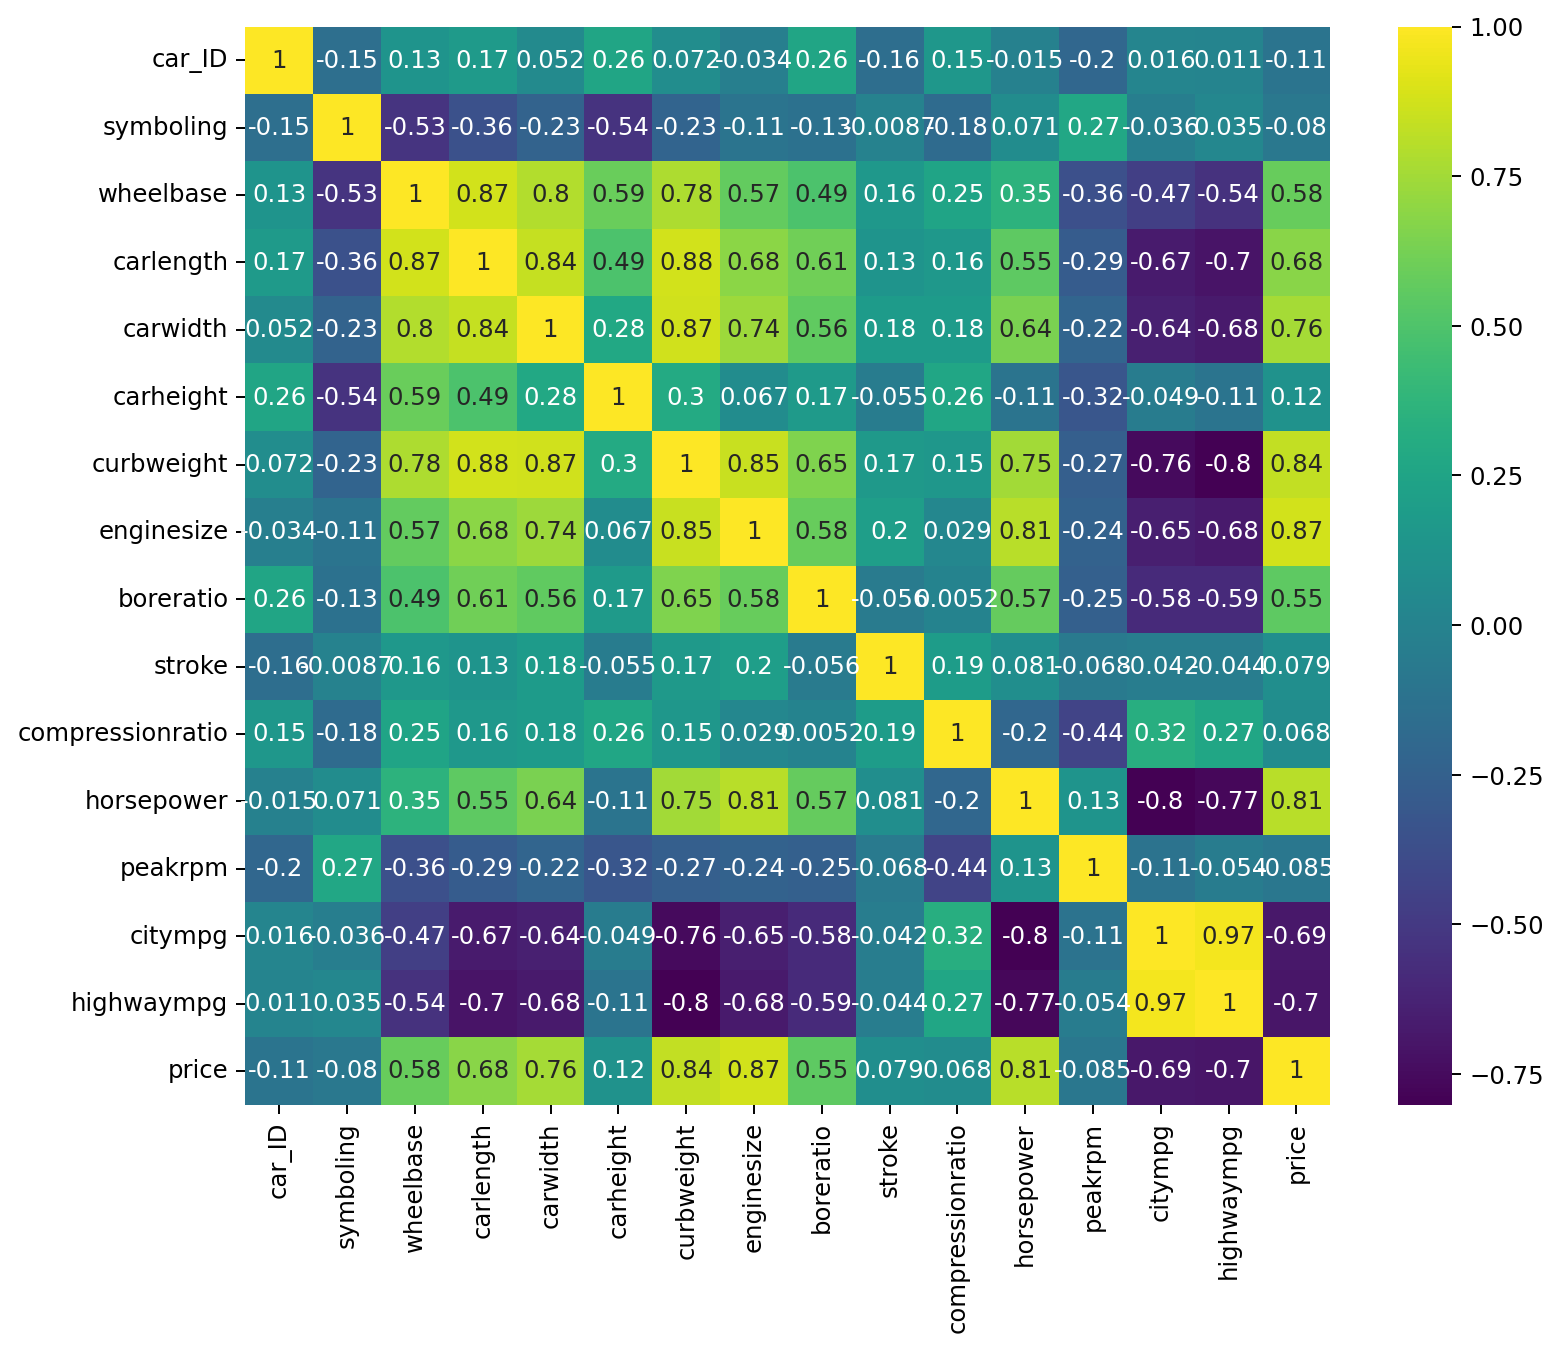

In [106]:
plt.figure(figsize=(10, 8), dpi=175)
sns.heatmap(car_Price.corr(), annot=True, cmap='viridis')

Inference
1. We can clearly see that enginesize, curbweight and horsepower have the most significant correlation with price
2. citympg and highwaympg are the most negatively correlated with price


### Visualising numerical data

<AxesSubplot:xlabel='symboling', ylabel='price'>

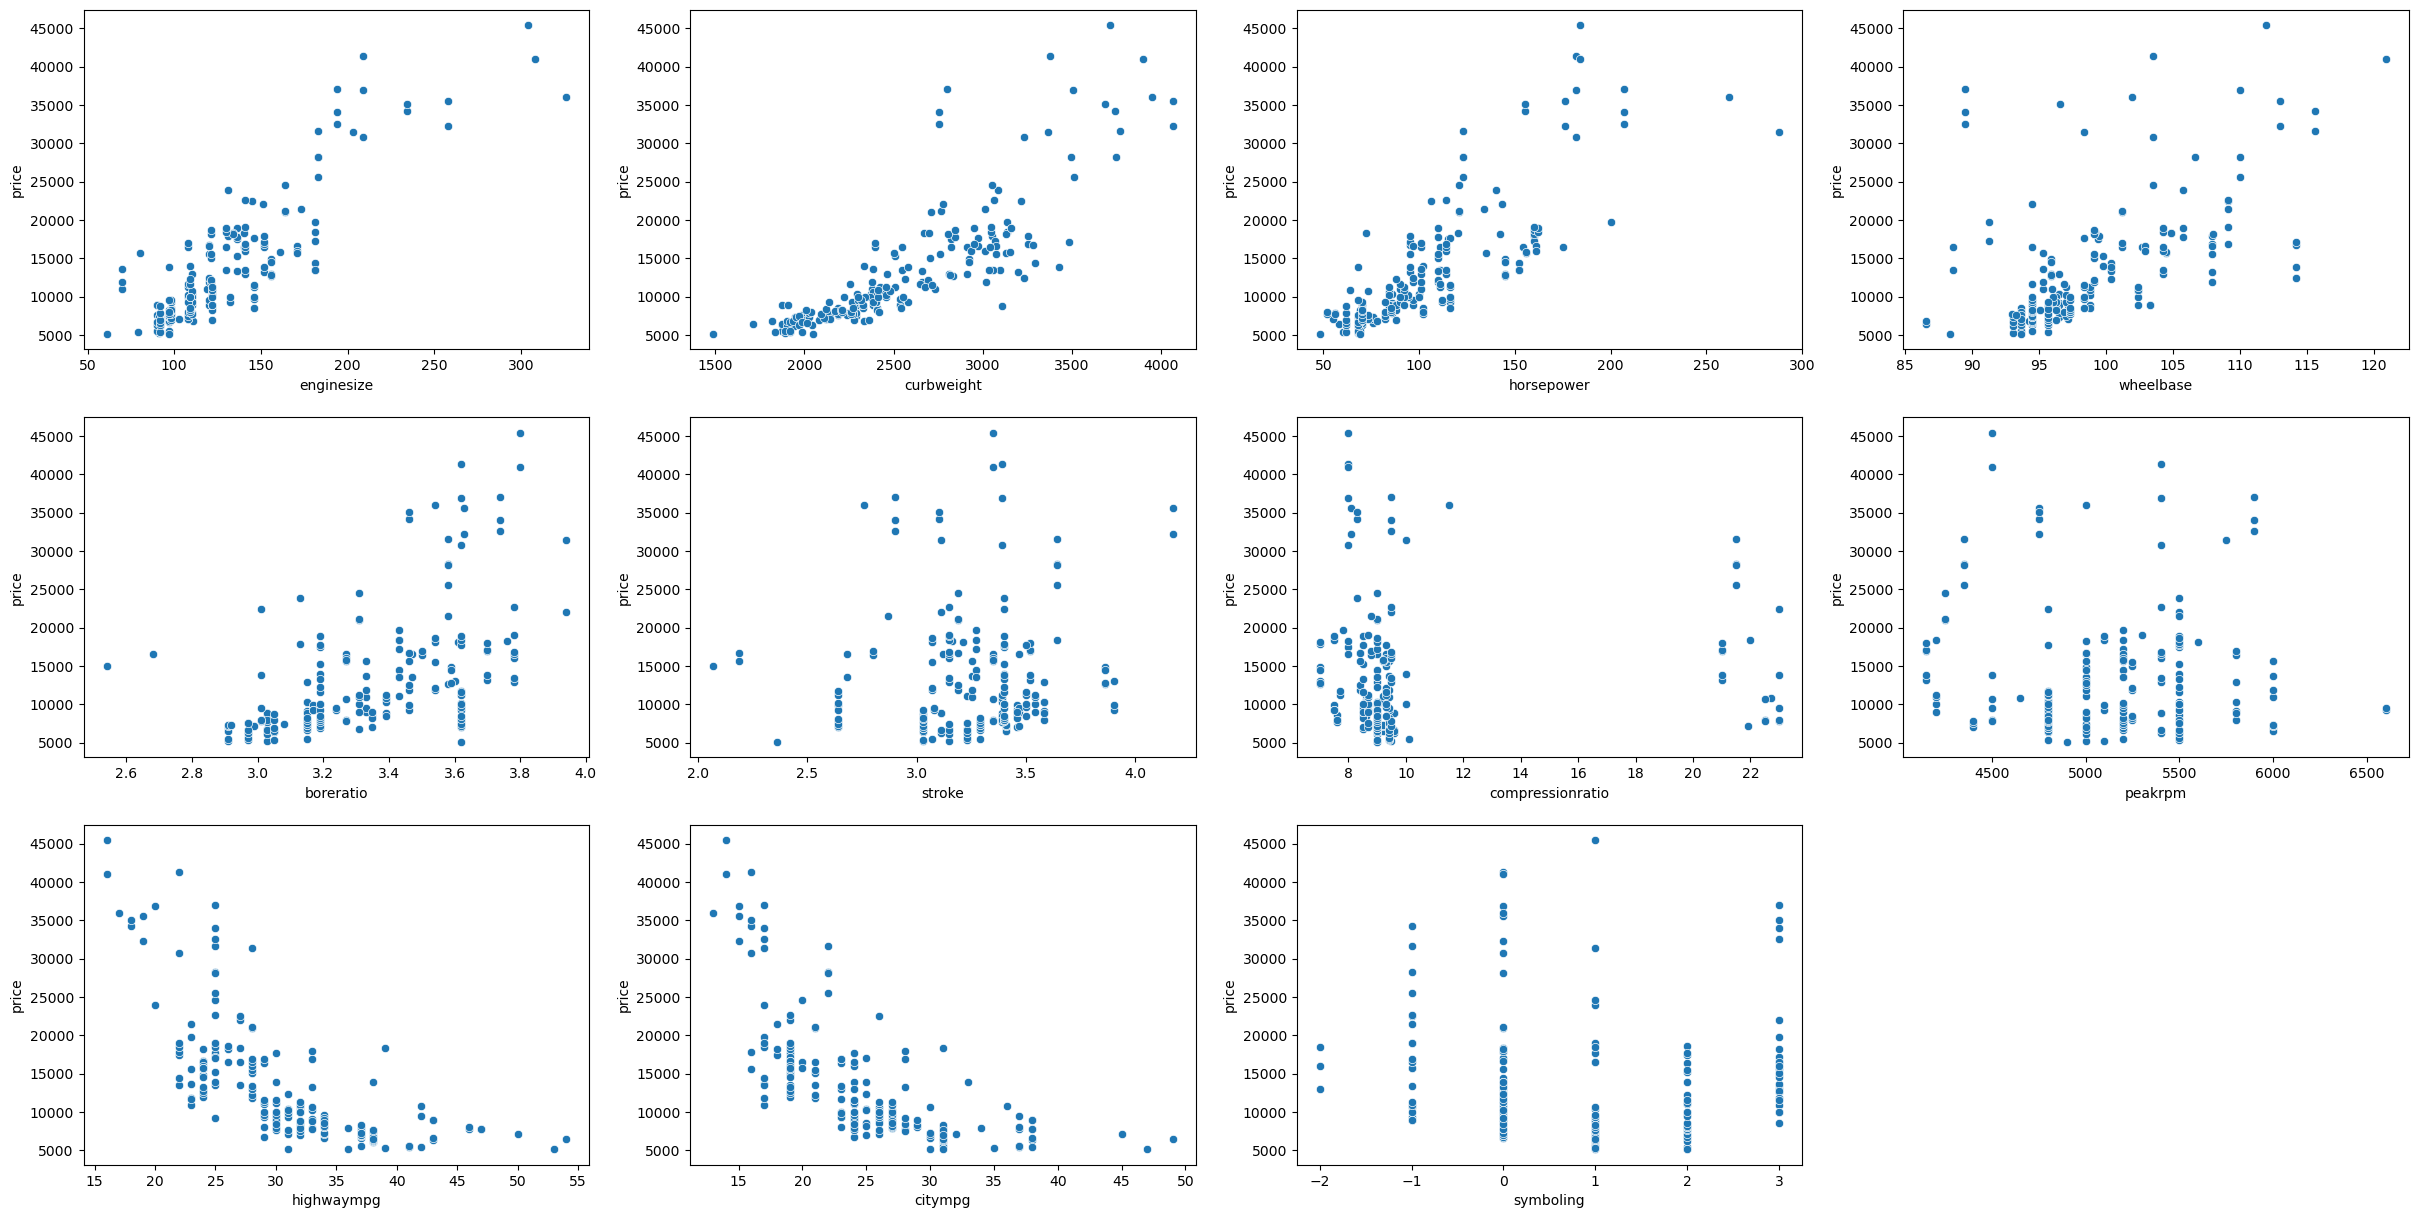

In [107]:
plt.figure(figsize=(30,15))
plt.subplot(3,4,1)
sns.scatterplot(x=car_Price['enginesize'], y =car_Price['price'])
plt.subplot(3,4,2)
sns.scatterplot(x=car_Price['curbweight'], y =car_Price['price'])
plt.subplot(3,4,3)
sns.scatterplot(x=car_Price['horsepower'], y =car_Price['price'])
plt.subplot(3,4,4)
sns.scatterplot(x=car_Price['wheelbase'], y =car_Price['price'])
plt.subplot(3,4,5)
sns.scatterplot(x=car_Price['boreratio'], y =car_Price['price'])
plt.subplot(3,4,6)
sns.scatterplot(x=car_Price['stroke'], y =car_Price['price'])
plt.subplot(3,4,7)
sns.scatterplot(x=car_Price['compressionratio'], y =car_Price['price'])
plt.subplot(3,4,8)
sns.scatterplot(x=car_Price['peakrpm'], y =car_Price['price'])
plt.subplot(3,4,9)
sns.scatterplot(x=car_Price['highwaympg'], y =car_Price['price'])
plt.subplot(3,4,10)
sns.scatterplot(x=car_Price['citympg'], y =car_Price['price'])
plt.subplot(3,4,11)
sns.scatterplot(x=car_Price['symboling'], y =car_Price['price'])


#### Inference 
1. enginesize, boreratio, horsepower, wheelbase seem to have a significant positive correlation with price.
2. citympg, highwaympg seem to have a significant negative correlation with price.
3. stroke, compressionratio and peakrpm are not linearly distributed hence dont really have much correlation with price 

<AxesSubplot:xlabel='carheight', ylabel='price'>

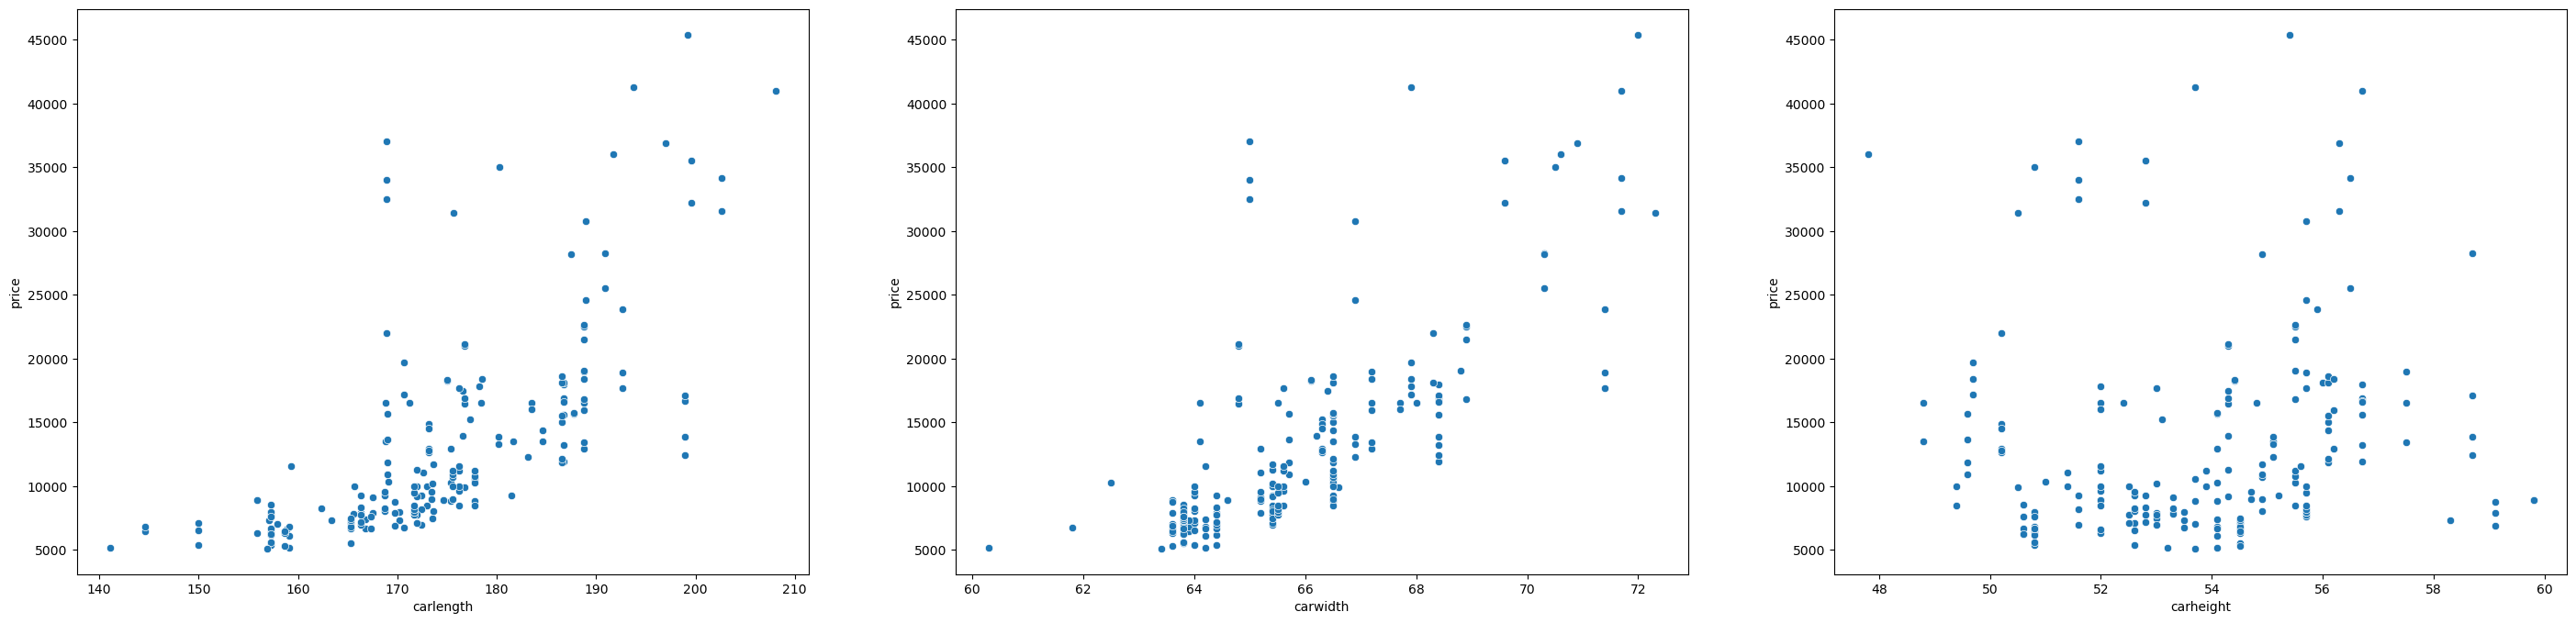

In [108]:
plt.figure(figsize=(35,8))
plt.subplot(1,3,1)
sns.scatterplot(x=car_Price['carlength'], y =car_Price['price'])
plt.subplot(1,3,2)
sns.scatterplot(x=car_Price['carwidth'], y =car_Price['price'])
plt.subplot(1,3,3)
sns.scatterplot(x=car_Price['carheight'], y =car_Price['price'])

#### Inference
1. carlength and carwidth seem to be significantly correlated to price whereas as carheight is moe scatter and hence doenst have much correlation

### Visualising Categorical Data

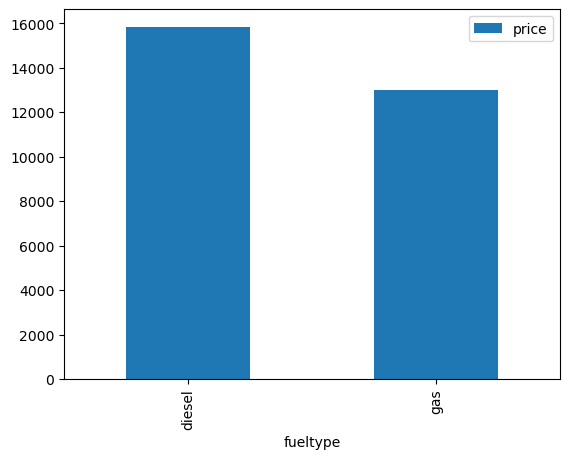

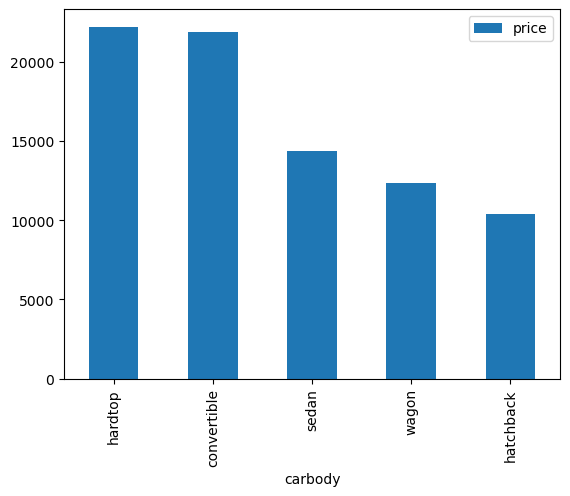

In [109]:
df = pd.DataFrame(car_Price.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.show()

df = pd.DataFrame(car_Price.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.show()

#### Inference 
1. diesel has higher average price than gas.
2. hardtop and convertible have higher average price.

<AxesSubplot:xlabel='drivewheel', ylabel='count'>

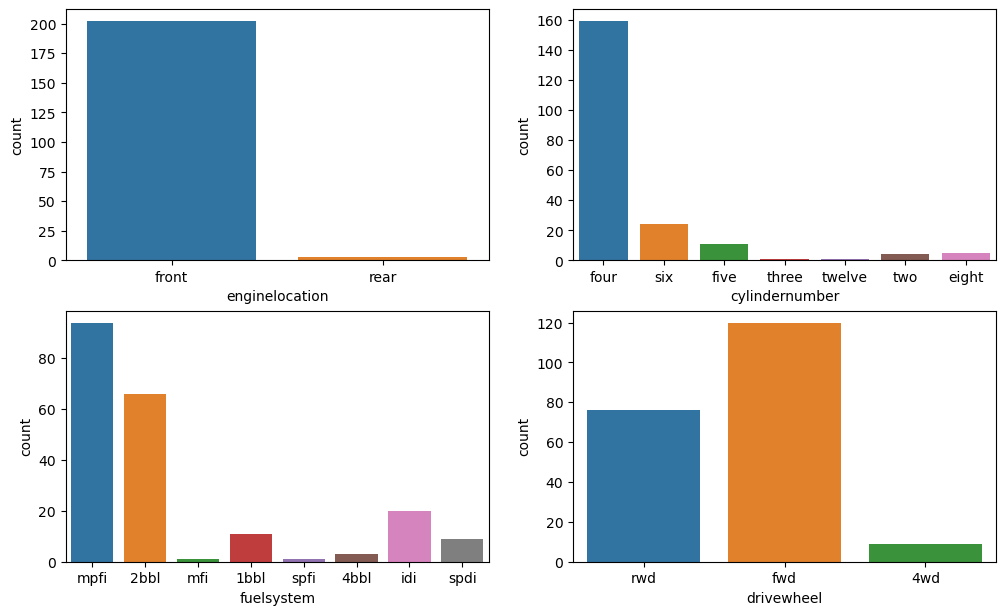

In [110]:
plt.figure(figsize=(12,15))
plt.subplot(4,2,1)
sns.countplot(car_Price['enginelocation'])
plt.subplot(4,2,2)
sns.countplot(car_Price['cylindernumber'])
plt.subplot(4,2,3)
sns.countplot(car_Price['fuelsystem'])
plt.subplot(4,2,4)
sns.countplot(car_Price['drivewheel'])

#### Inference 
1. Very few datapoints for enginelocation categories to make an inference.
2. Most common number of cylinders are four, six and five. Though eight cylinders have the highest price range.
3. mpfi and 2bbl are most common type of fuel systems. 
4. Most cars are fwd and least are 4wd

<AxesSubplot:xlabel='enginetype', ylabel='price'>

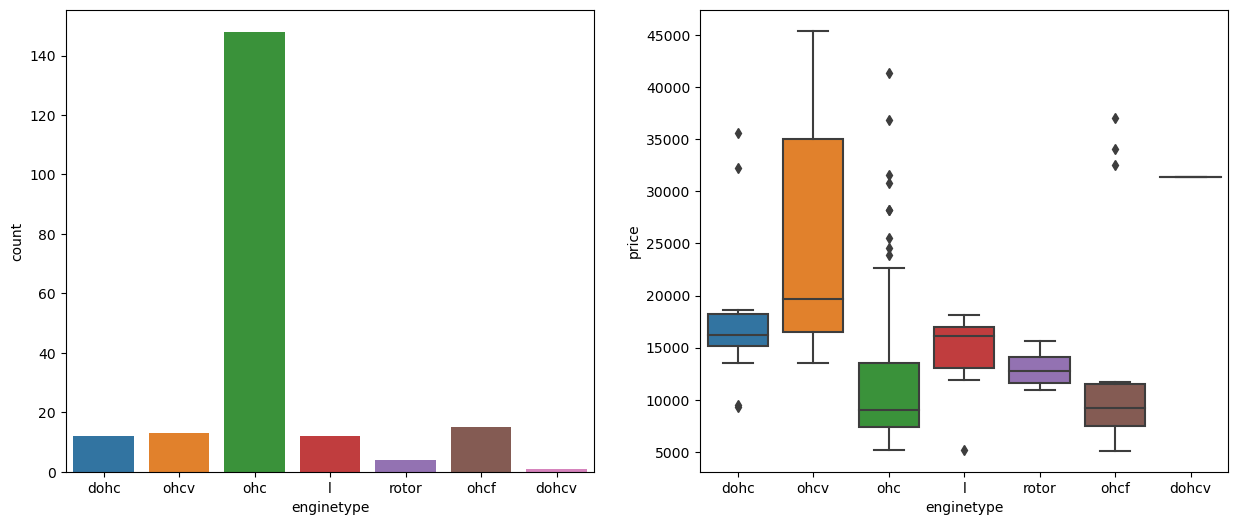

In [111]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(car_Price.enginetype)
plt.subplot(1,2,2)
sns.boxplot(x=car_Price.enginetype, y=car_Price.price)


#### Inference
1. ohc is the most popular type of engine
2. ohcv has the highest price range, whereas ohc and ohcf have the lowest price range

<AxesSubplot:xlabel='aspiration', ylabel='price'>

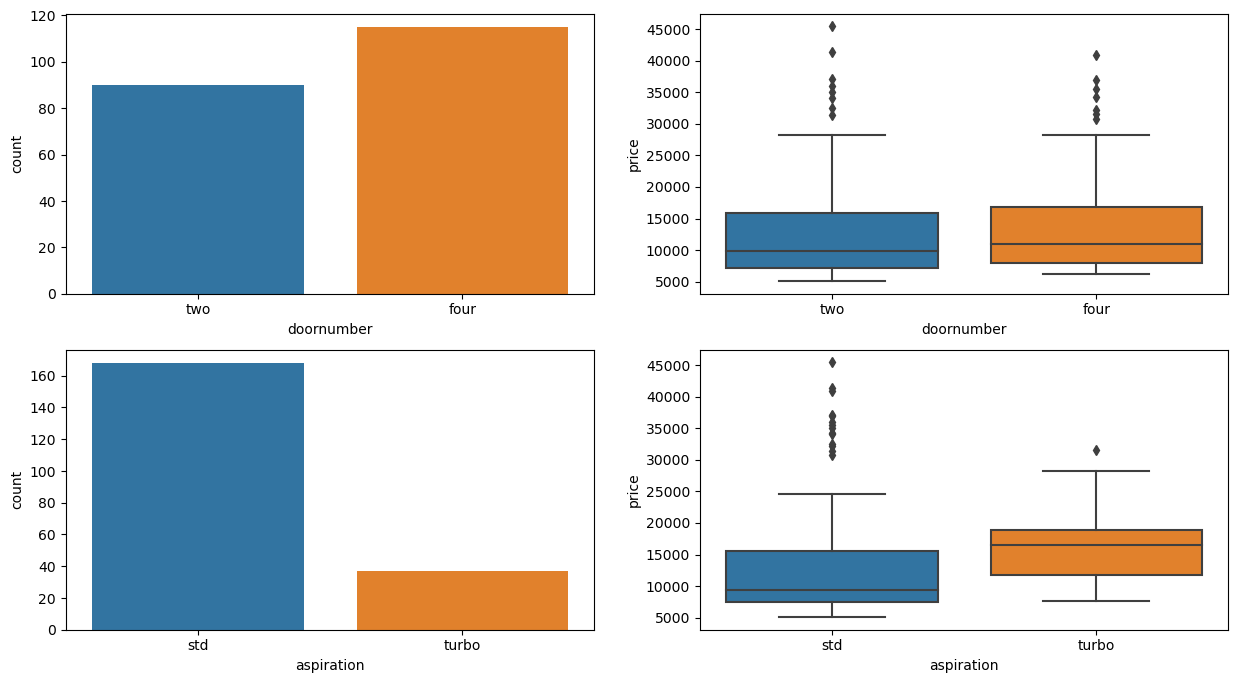

In [112]:
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
sns.countplot(car_Price.doornumber)
plt.subplot(2,2,2)
sns.boxplot(x=car_Price.doornumber, y=car_Price.price)
plt.subplot(2,2,3)
sns.countplot(car_Price.aspiration)
plt.subplot(2,2,4)
sns.boxplot(x=car_Price.aspiration, y=car_Price.price)

#### Inference 
1. doornumber doesnt seem to have much correlation with price, although it has a higher price range for some rows
2. turbo seems to have higher price range, thoug std has some high values.

## Categorising numerical and categorical data

In [113]:
car_Price_categorical= car_Price.select_dtypes(exclude=['float64','int64'])


In [114]:
car_Price_categorical.columns

Index(['CompanyName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

#### Dropping categorical columns
1. Dropping doornumber as it is not a significant towards the training dataset
2. dropping aspiration,enginetype, fueltype and fuelsystem because they are highly imbalanced characteristics.

In [115]:
car_Price_categorical = car_Price_categorical.drop(['doornumber','enginelocation','fuelsystem','fueltype','enginetype'], axis=1)

In [116]:
car_Price_numeric = car_Price.select_dtypes(['float64','int64'])

In [117]:
car_Price_numeric

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [118]:
car_Price_numeric.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

#### Dropping numeric columns
1. car_ID is dropped because we already created CompanyName column for names of the cars
2. Symboling, carheight, peakrpm, compressionratio, and stroke have been droppen because of very low normality and correlation with the dependant variable 

In [119]:
car_Price_numeric = car_Price_numeric.drop(['car_ID','stroke','compressionratio','peakrpm','carheight','symboling'], axis=1)

In [120]:
cars_lr = car_Price_numeric

In [121]:
cars_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wheelbase   205 non-null    float64
 1   carlength   205 non-null    float64
 2   carwidth    205 non-null    float64
 3   curbweight  205 non-null    int64  
 4   enginesize  205 non-null    int64  
 5   boreratio   205 non-null    float64
 6   horsepower  205 non-null    int64  
 7   citympg     205 non-null    int64  
 8   highwaympg  205 non-null    int64  
 9   price       205 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 16.1 KB


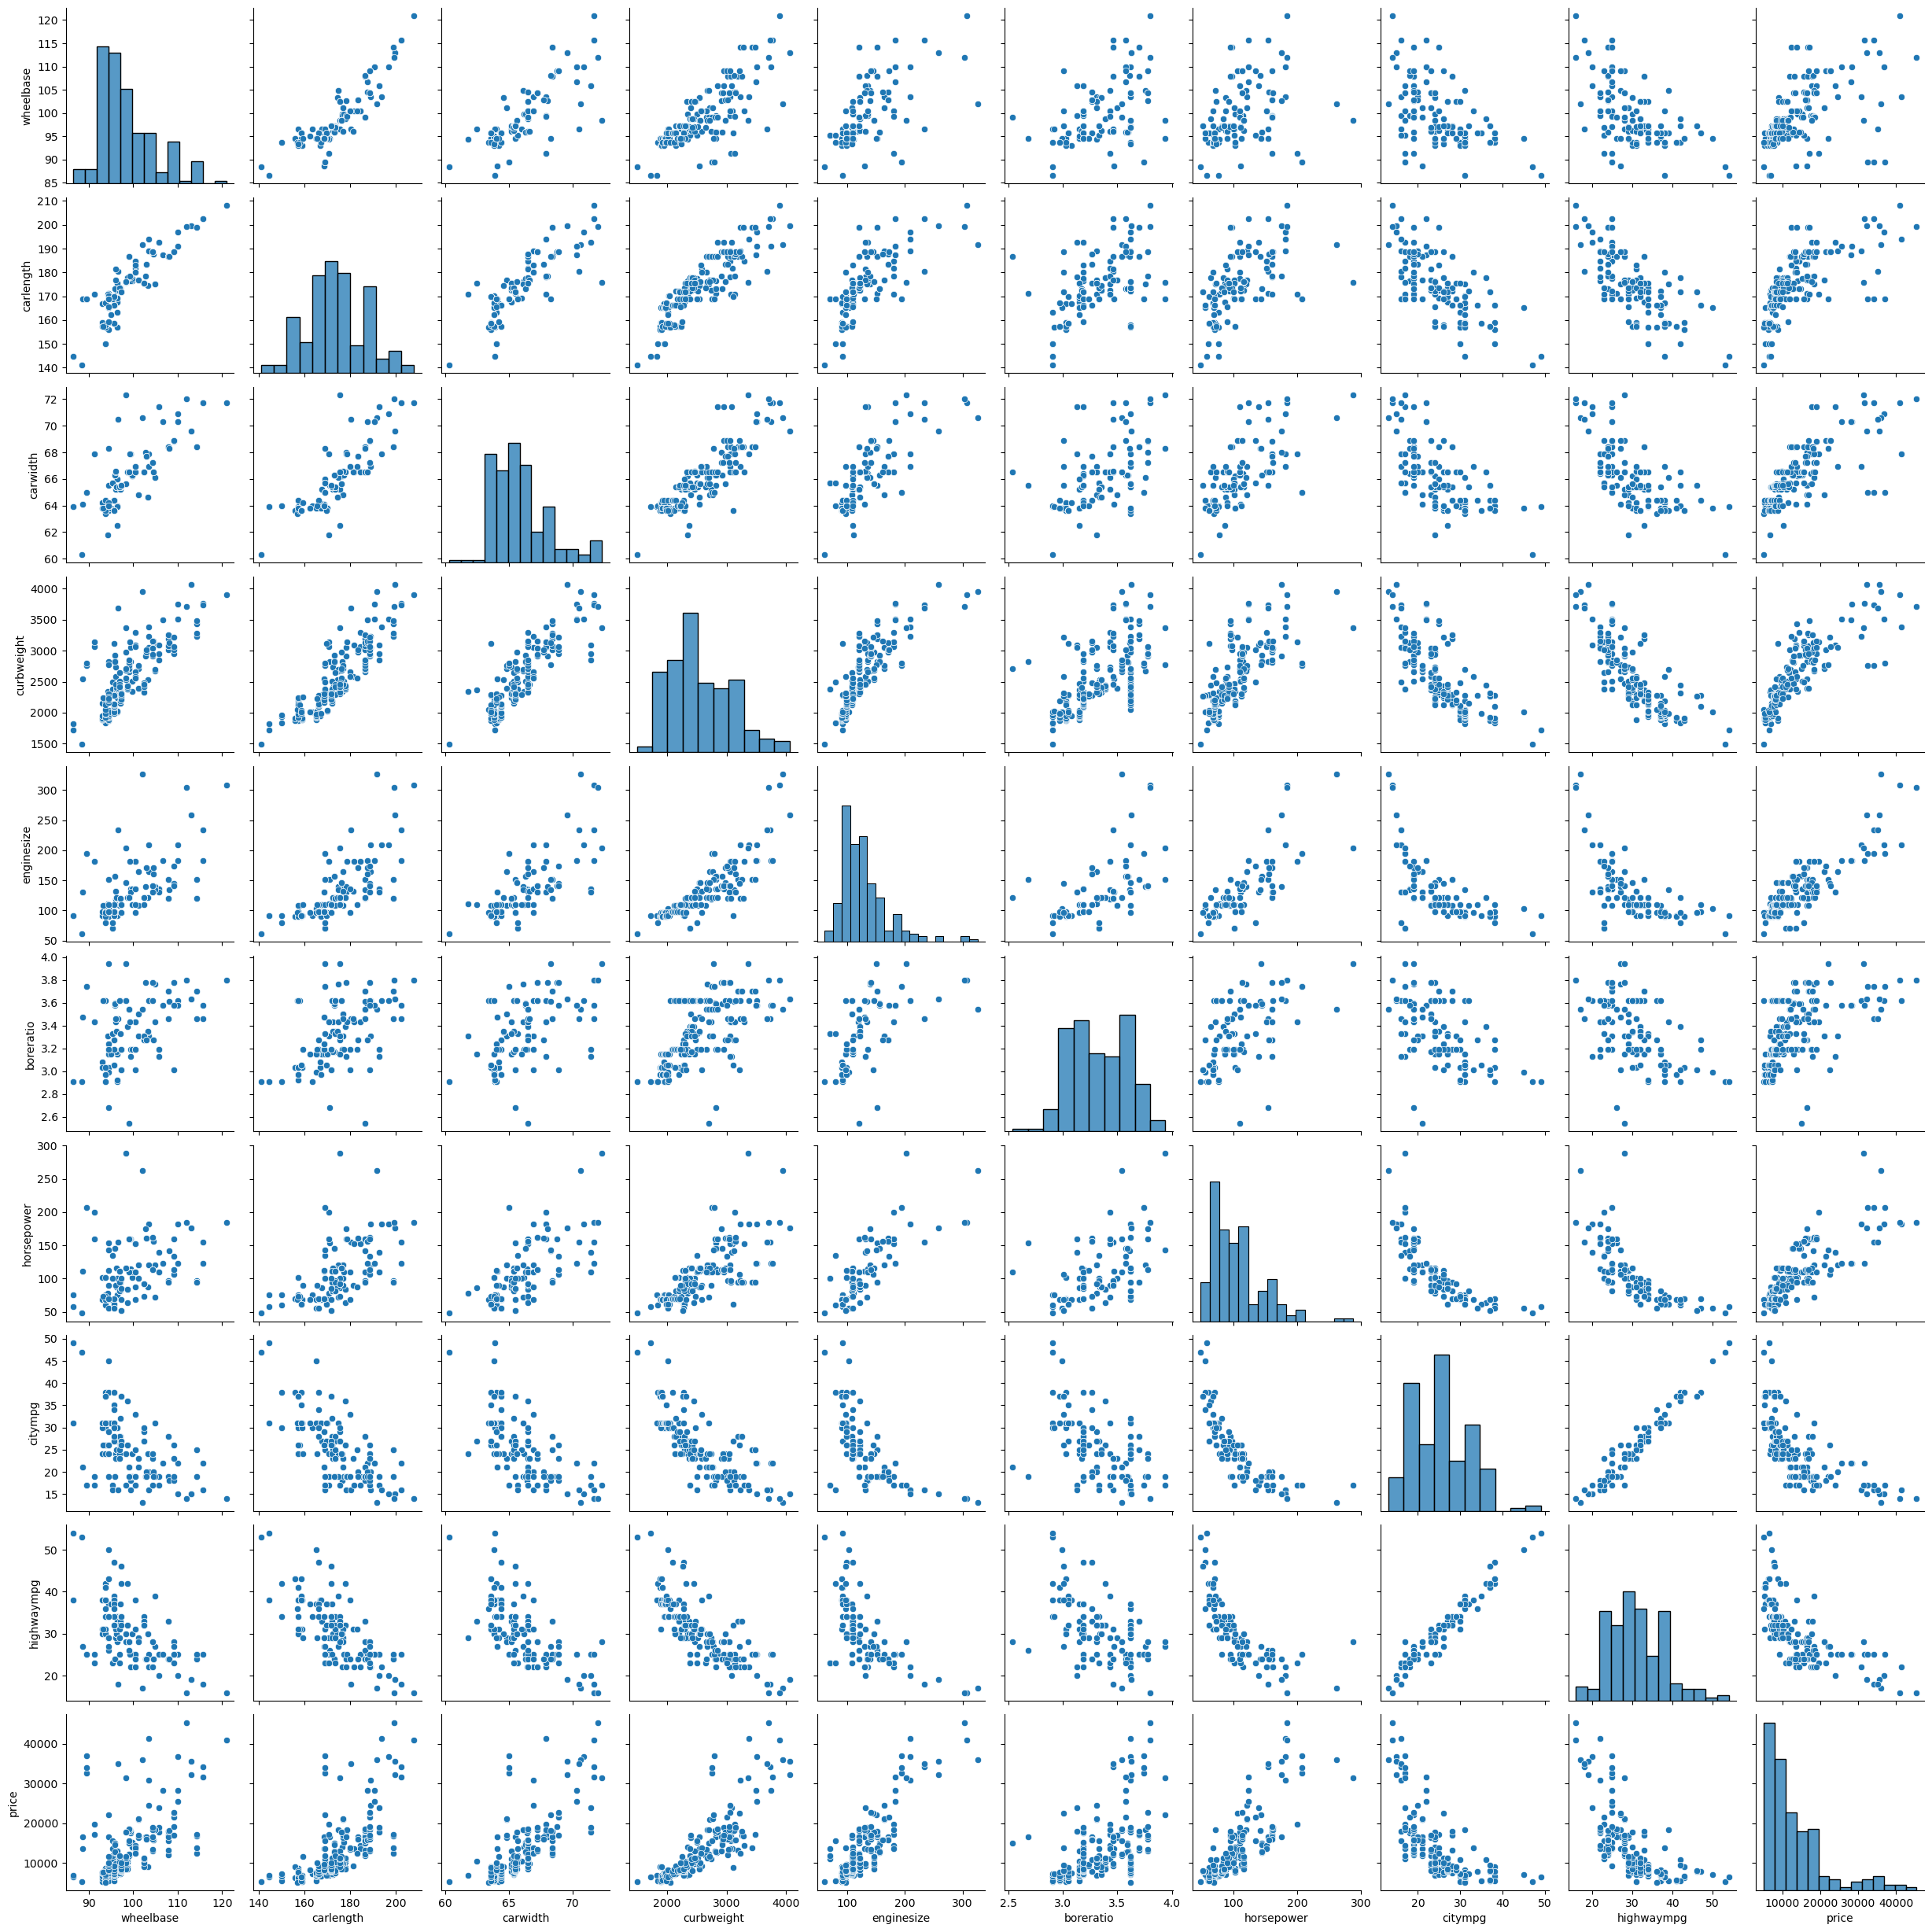

In [122]:
sns.pairplot(cars_lr)
plt.show()

## changing categorical data using one hot encoding 

In [123]:
car_Price_dummies = pd.get_dummies(car_Price_categorical, drop_first=True)
car_Price_dummies.head()

,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mercury,...,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [124]:
car_Price = car_Price.drop(list(car_Price_categorical.columns), axis=1)

In [125]:
car_Price = pd.concat([cars_lr, car_Price_dummies], axis=1)

In [126]:
car_Price.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,...,0,0,0,1,0,1,0,0,0,0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,...,0,0,0,1,0,1,0,0,0,0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,...,0,0,0,1,0,0,1,0,0,0
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,...,1,0,1,0,0,1,0,0,0,0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,...,1,0,0,0,1,0,0,0,0,0


In [127]:
car_Price.columns

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'citympg', 'highwaympg', 'price',
       'CompanyName_audi', 'CompanyName_bmw', 'CompanyName_buick',
       'CompanyName_chevrolet', 'CompanyName_dodge', 'CompanyName_honda',
       'CompanyName_isuzu', 'CompanyName_jaguar', 'CompanyName_mazda',
       'CompanyName_mercury', 'CompanyName_mitsubishi', 'CompanyName_nissan',
       'CompanyName_peugeot', 'CompanyName_plymouth', 'CompanyName_porsche',
       'CompanyName_renault', 'CompanyName_saab', 'CompanyName_subaru',
       'CompanyName_toyota', 'CompanyName_volkswagen', 'CompanyName_volvo',
       'aspiration_turbo', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [128]:
car_Price.corr()['price'].sort_values(ascending=False)

price                     1.000000
enginesize                0.874145
curbweight                0.835305
horsepower                0.808139
carwidth                  0.759325
carlength                 0.682920
drivewheel_rwd            0.638957
wheelbase                 0.577816
boreratio                 0.553173
CompanyName_buick         0.515094
cylindernumber_six        0.474978
CompanyName_porsche       0.359581
CompanyName_jaguar        0.326074
CompanyName_bmw           0.324731
cylindernumber_five       0.249606
carbody_hardtop           0.225854
cylindernumber_twelve     0.199634
aspiration_turbo          0.177926
CompanyName_volvo         0.143017
carbody_sedan             0.125716
CompanyName_audi          0.108117
CompanyName_peugeot       0.066105
CompanyName_saab          0.042414
CompanyName_mercury       0.028344
cylindernumber_two       -0.004544
carbody_wagon            -0.042310
CompanyName_renault      -0.045856
cylindernumber_three     -0.071388
CompanyName_isuzu   

## Model Building

In [129]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(car_Price, train_size=0.7, test_size=0.3, random_state=100)


### Scaling the model

In [130]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','citympg','highwaympg','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [131]:
df_train.sort_index(axis=0)

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,-1.670284,-0.367754,-0.788535,0.015642,0.123485,0.625138,0.213410,-0.657578,-0.557490,0.056384,...,0,0,0,1,0,1,0,0,0,0
1,-1.670284,-0.367754,-0.788535,0.015642,0.123485,0.625138,0.213410,-0.657578,-0.557490,0.442646,...,0,0,0,1,0,1,0,0,0,0
2,-0.677177,-0.176580,-0.154030,0.522328,0.662298,-2.412359,1.299718,-0.957048,-0.701390,0.442646,...,0,0,0,1,0,0,1,0,0,0
4,0.147606,0.253562,0.253865,0.524170,0.270434,-0.451443,0.314462,-1.106783,-1.276993,0.564759,...,1,0,0,0,1,0,0,0,0,0
5,0.214936,0.309321,0.208543,-0.059900,0.270434,-0.451443,0.188147,-0.957048,-0.845291,0.281972,...,1,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.972390,1.225364,0.616439,0.728687,0.392891,1.817067,0.289199,-0.208373,-0.413589,0.376448,...,1,0,0,1,0,1,0,0,0,0
199,0.972390,1.225364,0.616439,1.137720,0.123485,1.201877,1.501822,-1.256518,-1.276993,0.757569,...,0,1,0,1,0,1,0,0,0,0
202,1.780341,1.225364,1.386908,0.870559,1.176619,1.048080,0.794459,-1.106783,-1.133093,1.083417,...,1,0,0,1,0,0,1,0,0,0
203,1.780341,1.225364,1.386908,1.248270,0.490857,-1.143531,0.087095,0.091098,-0.557490,1.210029,...,1,0,0,1,0,0,1,0,0,0


In [132]:
df_train.describe()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
count,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,1.538785e-15,2.003060e-16,-4.093074e-15,-1.894367e-16,-4.308908e-17,-1.059758e-15,1.195625e-16,2.655219e-16,1.599342e-16,1.925422e-16,...,0.475524,0.132867,0.594406,0.349650,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972
std,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,...,0.501156,0.340624,0.492733,0.478536,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472
min,-2.006930e+00,-2.574223e+00,-2.510760e+00,-1.937401e+00,-1.566427e+00,-2.412359e+00,-1.378157e+00,-1.855458e+00,-1.996497e+00,-1.020394e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.771770e-01,-6.186702e-01,-8.565171e-01,-7.711028e-01,-6.847340e-01,-9.320600e-01,-8.223718e-01,-9.570476e-01,-8.452912e-01,-7.072706e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-3.405307e-01,-1.128552e-01,-1.993522e-01,-2.478347e-01,-3.663447e-01,9.948427e-03,-2.160603e-01,-5.863749e-02,1.811338e-02,-3.674114e-01,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,4.505882e-01,7.076008e-01,4.804736e-01,7.203955e-01,3.928914e-01,8.942829e-01,3.397252e-01,8.397726e-01,8.095676e-01,4.381475e-01,...,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.874442e+00,2.324616e+00,2.927846e+00,2.812547e+00,4.923816e+00,2.432256e+00,4.684957e+00,3.535003e+00,3.327831e+00,3.632362e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [133]:
y_train = df_train.pop('price')
X_train = df_train

### Model building using RFE

In [134]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [135]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [136]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 20),
 ('carlength', False, 28),
 ('carwidth', False, 8),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 5),
 ('horsepower', False, 10),
 ('citympg', False, 23),
 ('highwaympg', False, 21),
 ('CompanyName_audi', True, 1),
 ('CompanyName_bmw', True, 1),
 ('CompanyName_buick', True, 1),
 ('CompanyName_chevrolet', False, 14),
 ('CompanyName_dodge', False, 27),
 ('CompanyName_honda', False, 25),
 ('CompanyName_isuzu', False, 6),
 ('CompanyName_jaguar', True, 1),
 ('CompanyName_mazda', False, 13),
 ('CompanyName_mercury', False, 29),
 ('CompanyName_mitsubishi', False, 9),
 ('CompanyName_nissan', False, 15),
 ('CompanyName_peugeot', False, 12),
 ('CompanyName_plymouth', False, 26),
 ('CompanyName_porsche', True, 1),
 ('CompanyName_renault', False, 24),
 ('CompanyName_saab', True, 1),
 ('CompanyName_subaru', False, 3),
 ('CompanyName_toyota', False, 16),
 ('CompanyName_volkswagen', False, 18),
 ('CompanyName_volvo', True, 1),
 ('aspiration_turbo

#### Building model using statsmodel, for the detailed statistics


In [137]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,curbweight,enginesize,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_jaguar,CompanyName_porsche,CompanyName_saab,CompanyName_volvo,carbody_hatchback,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_three,cylindernumber_two
122,-0.642128,-0.660242,0,0,0,0,0,0,0,0,1,0,0,0,0
125,0.439415,0.637806,0,0,0,0,1,0,0,1,0,0,0,0,0
166,-0.441296,-0.660242,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0.015642,0.123485,0,0,0,0,0,0,0,0,0,0,0,0,0
199,1.137720,0.123485,0,0,0,0,0,0,1,0,0,1,0,0,0


In [138]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

### Model 1

In [139]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     115.9
Date:                Mon, 28 Aug 2023   Prob (F-statistic):           2.03e-66
Time:                        10:33:17   Log-Likelihood:                -10.781
No. Observations:                 143   AIC:                             53.56
Df Residuals:                     127   BIC:                             101.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1001 

In [140]:
checkVIF(X_train_new.drop('const', axis=1))

,Features,VIF
1,enginesize,9.82
0,curbweight,7.23
12,cylindernumber_five,4.34
2,CompanyName_audi,3.37
4,CompanyName_buick,2.41
5,CompanyName_jaguar,2.23
10,carbody_sedan,1.55
14,cylindernumber_two,1.47
3,CompanyName_bmw,1.37
9,carbody_hatchback,1.34


## Variance Inflation Factor(VIF)
### It is a quantitative measure used to assess multicollinearity in a regression analysis. Specifically, it quantifies how much the variance of the    estimated regression coefficient is increased due to multicollinearity among predictor variables.                                         
       We use VIF value of less than 5 in the model. 


In [141]:
X_train_new = X_train_new.drop(["enginesize"], axis = 1)

### Model 2

In [142]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     110.9
Date:                Mon, 28 Aug 2023   Prob (F-statistic):           2.26e-64
Time:                        10:33:17   Log-Likelihood:                -18.822
No. Observations:                 143   AIC:                             67.64
Df Residuals:                     128   BIC:                             112.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1686 

In [143]:
checkVIF(X_train_new.drop('const', axis=1))

,Features,VIF
11,cylindernumber_five,4.17
1,CompanyName_audi,3.33
0,curbweight,2.19
3,CompanyName_buick,2.18
9,carbody_sedan,1.54
4,CompanyName_jaguar,1.50
8,carbody_hatchback,1.34
2,CompanyName_bmw,1.24
7,CompanyName_volvo,1.23
13,cylindernumber_two,1.10


### Model 3

In [144]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     110.9
Date:                Mon, 28 Aug 2023   Prob (F-statistic):           2.26e-64
Time:                        10:33:17   Log-Likelihood:                -18.822
No. Observations:                 143   AIC:                             67.64
Df Residuals:                     128   BIC:                             112.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1686 

### The coefficients should have very low p value (<0.05)
###  F statistic should have a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

In [145]:
X_train_new = X_train_new.drop(["cylindernumber_five"], axis = 1)

### Model 4

In [146]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     119.1
Date:                Mon, 28 Aug 2023   Prob (F-statistic):           3.74e-65
Time:                        10:33:17   Log-Likelihood:                -19.514
No. Observations:                 143   AIC:                             67.03
Df Residuals:                     129   BIC:                             108.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1884 

In [147]:
X_train_new = X_train_new.drop(["cylindernumber_three"], axis = 1)

### Model 5

In [148]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     128.3
Date:                Mon, 28 Aug 2023   Prob (F-statistic):           6.91e-66
Time:                        10:33:17   Log-Likelihood:                -20.366
No. Observations:                 143   AIC:                             66.73
Df Residuals:                     130   BIC:                             105.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1868    

In [149]:
X_train_new = X_train_new.drop(["CompanyName_saab"], axis = 1)

### Model 6

In [150]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     138.3
Date:                Mon, 28 Aug 2023   Prob (F-statistic):           1.88e-66
Time:                        10:33:17   Log-Likelihood:                -21.680
No. Observations:                 143   AIC:                             67.36
Df Residuals:                     131   BIC:                             102.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1914    

In [151]:
checkVIF(X_train_new.drop('const', axis=1))

,Features,VIF
0,curbweight,2.06
4,CompanyName_jaguar,1.46
8,carbody_sedan,1.46
3,CompanyName_buick,1.42
7,carbody_hatchback,1.30
2,CompanyName_bmw,1.22
6,CompanyName_volvo,1.21
1,CompanyName_audi,1.13
10,cylindernumber_two,1.10
5,CompanyName_porsche,1.08


## Residual Analysis of Model

In [152]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

### The following graph shows the distribution of error terms

Text(0.5, 0, 'Errors')

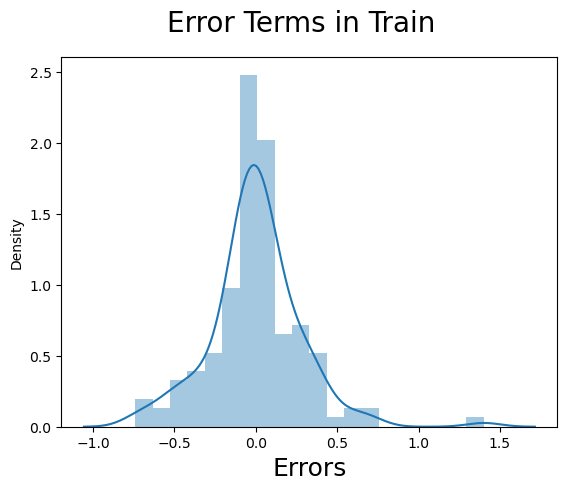

In [153]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms in Train', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)   

Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

### Prediction and Evaluation

In [154]:
#Scaling the test set
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','highwaympg','citympg', 'carlength','carwidth','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [155]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [156]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [157]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Evaluation of test via comparison of y_pred and y_test


In [158]:
from sklearn.metrics import mean_squared_error


In [159]:
# Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test,y_pred))

0.32916007193575236

In [160]:
# Returns the R2 score of the test data
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8916536470432503

Text(0, 0.5, 'y_pred')

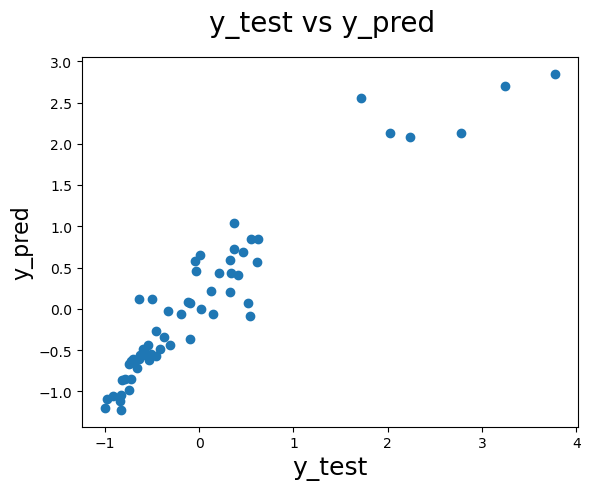

In [161]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

### Checking the correlations between the final predictor variables

<AxesSubplot:>

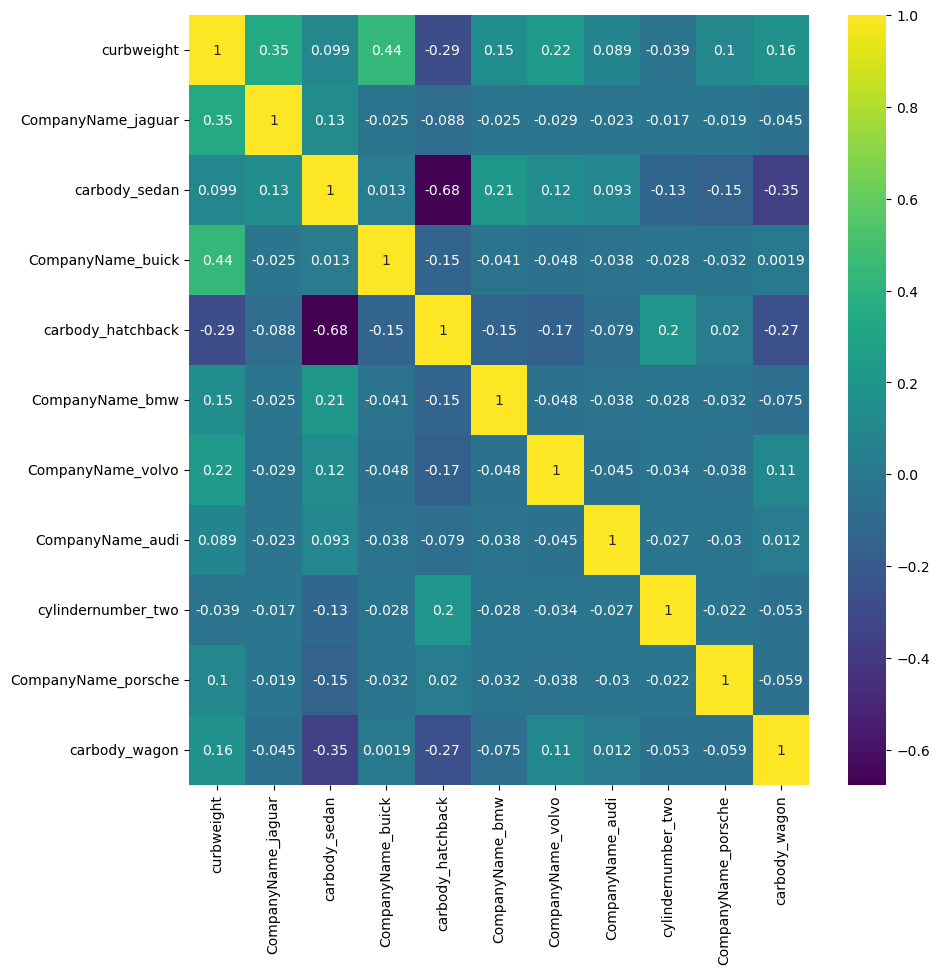

In [162]:
features = ['curbweight','CompanyName_jaguar','carbody_sedan','CompanyName_buick','carbody_hatchback',
'CompanyName_bmw','CompanyName_volvo','CompanyName_audi','cylindernumber_two','CompanyName_porsche','carbody_wagon']
plt.figure(figsize=(10,10))
sns.heatmap(car_Price[features].corr(), annot=True, cmap="viridis")